I'm trying to make make 5 clusters of shoppers from the dataset: retail_customers.csv and based the cluster based on their 'Annual Income (k$)'  and 'Spending Score (1-100)'

In [ ]:
#Import all Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
#Load the dataset into a variable 'df' and print the first 10 records
df = pd.read_csv('retail_customers.csv')
print(df.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [ ]:
#we will explore cluserting the customers based on their annual income
#and spending score to see if there are distinguisbale clusters which the retailer can target.

#Extract the columns 'Annual Income (k$)'  and 'Spending Score (1-100)' to a variable called 'data'

data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print("Extracted 'Annual Income (k$)' and 'Spending Score (1-100)' to 'data'.")

Extracted 'Annual Income (k$)' and 'Spending Score (1-100)' to 'data'.


In [ ]:
#Print 'data'
print(data.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [ ]:
#Scale the above two features using StandardScaler and save it to a variable 'X'

scaler = StandardScaler()
X = scaler.fit_transform(data)
print("Features scaled successfully and stored in 'X'.")

Features scaled successfully and stored in 'X'.


### Dendograms

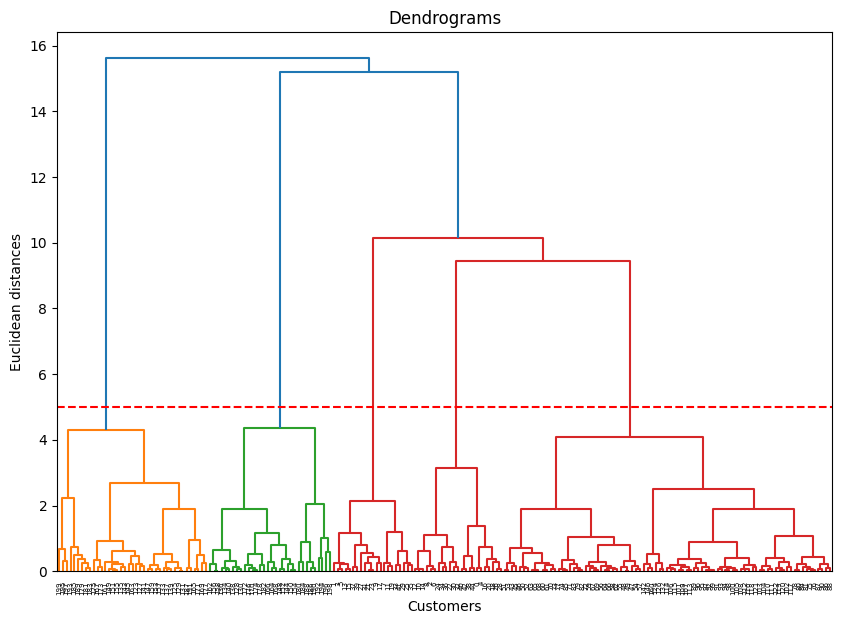

Dendrogram with 5-cluster threshold plotted successfully.


In [ ]:
#Plot a dentogram using method='ward' with a horizontal line crossing 5 vertical lines
plt.figure(figsize=(10,7))
dend = dendrogram(linkage(X, method='ward'))
plt.title('Dendrograms')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.axhline(y=5, color='r', linestyle='--') # Add horizontal line to identify 5 clusters
plt.show()
print("Dendrogram with 5-cluster threshold plotted successfully.")

### Hierarchical Clustering

In [ ]:
# Build a model using AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

# Make predicts using the model designed and save the predictions to a variable called 'y_hc'
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = model.fit_predict(X)
print("Agglomerative Clustering model built and predictions saved to 'y_hc'.")
print(y_hc)

Agglomerative Clustering model built and predictions saved to 'y_hc'.
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


Plotting the cluster (Note: Code for plotting the cluster was privded from external support)

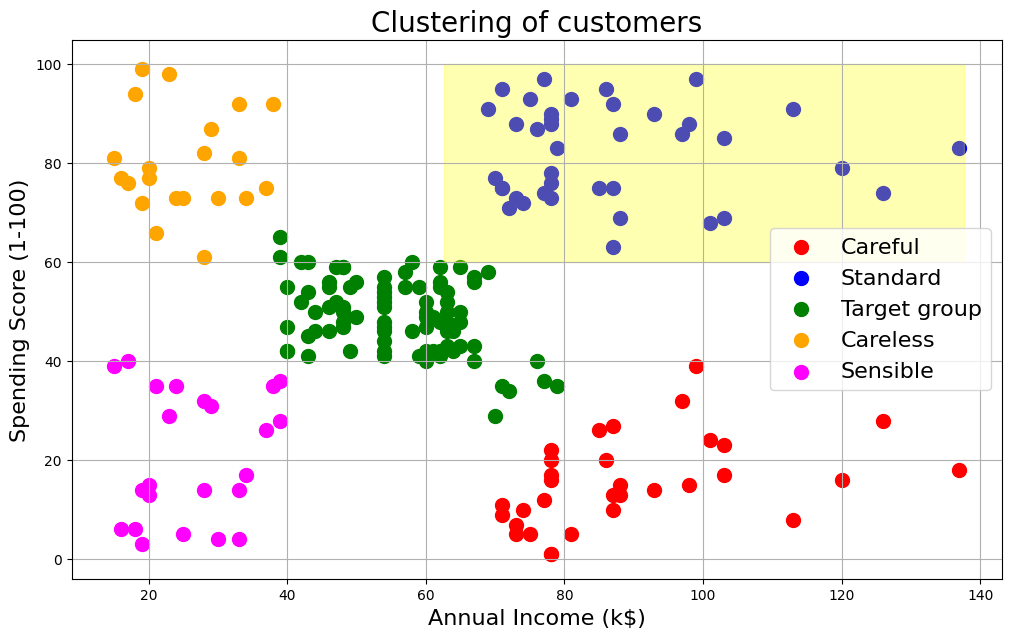

Scatter plot of clusters with labels generated successfully.


In [ ]:
# Plot the cluster using the following code. 
plt.figure(figsize=(12,7))
plt.scatter(data[y_hc == 0].iloc[:, 0], data[y_hc == 0].iloc[:, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(data[y_hc == 1].iloc[:, 0], data[y_hc == 1].iloc[:, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(data[y_hc == 2].iloc[:, 0], data[y_hc == 2].iloc[:, 1], s = 100, c = 'green', label = 'Target group')
plt.scatter(data[y_hc == 3].iloc[:, 0], data[y_hc == 3].iloc[:, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(data[y_hc == 4].iloc[:, 0], data[y_hc == 4].iloc[:, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clustering of customers',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=16)
plt.ylabel('Spending Score (1-100)',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.96,alpha=0.3,color='yellow')
plt.show()
print("Scatter plot of clusters with labels generated successfully.")

#### Verify the optimal number of clusters by k-means algorithm

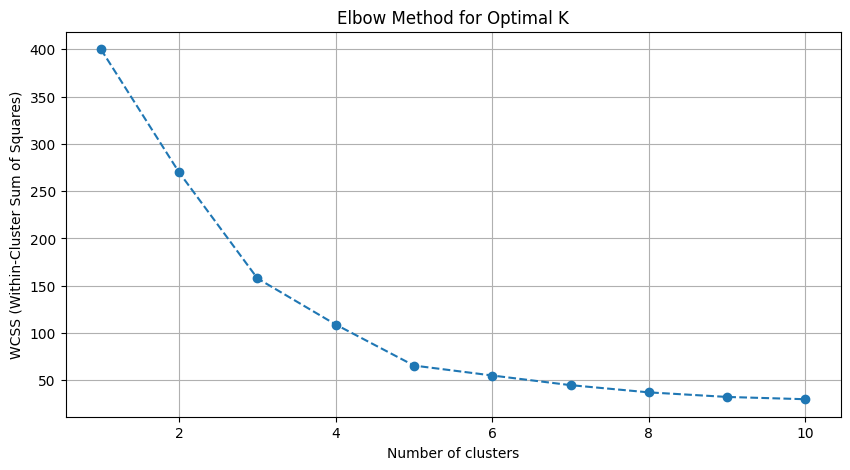

Elbow method plot generated successfully.


In [ ]:
#Using Elbow method find the optimum number of clusters for k-means

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()
print("Elbow method plot generated successfully.")